In [298]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf

## PCA: Finding the common drivers

In [299]:
#!pip install factor_analyzer
import factor_analyzer

In [300]:
# some functions to format PCA results
def get_loadings_communalities(pca,round_dig=2,index_names=None):
  '''Returns a DataFrame containings the loadings'''
  df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
  if pca.rotation:
    df['communalities']=pca.get_communalities()
  df=df.round(3)
  return  df

def get_summary(pca,round_dig=2):
  ''' Print a summary of the PCA fit '''
  return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squared Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

Adding variables

In [245]:
import yfinance as yf
import datetime as dt

In [247]:
SOL= yf.download('SOL-USD',period='100mo', interval='1d')
SOL['Date']=SOL.index
SOL['Date'] = pd.to_datetime(SOL['Date']).dt.date
SOL.set_index('Date', inplace=True)
SOL['SOL']=SOL['Adj Close'].pct_change()
SOL=SOL[['SOL']]

[*********************100%***********************]  1 of 1 completed


In [248]:
MATIC= yf.download('MATIC-USD',period='100mo',interval='1d')
MATIC['Date']=MATIC.index
MATIC['Date'] = pd.to_datetime(MATIC['Date']).dt.date
MATIC.set_index('Date', inplace=True)
MATIC['MATIC']=MATIC['Adj Close'].pct_change()
MATIC=MATIC[['MATIC']]

[*********************100%***********************]  1 of 1 completed


In [249]:
ETH=yf.download('ETH-USD',period='100mo',interval='1d')
ETH['Date']=ETH.index
ETH['Date'] = pd.to_datetime(ETH['Date']).dt.date
ETH.set_index('Date', inplace=True)
ETH['ETH']=ETH['Adj Close'].pct_change()
ETH=ETH[['ETH']]

[*********************100%***********************]  1 of 1 completed


In [250]:
BTC=yf.download('BTC-USD',period='100mo',interval='1d')
BTC['Date']=BTC.index
BTC['Date'] = pd.to_datetime(BTC['Date']).dt.date
BTC.set_index('Date', inplace=True)
BTC['BTC']=BTC['Adj Close'].pct_change()
BTC=BTC[['BTC']]

[*********************100%***********************]  1 of 1 completed


In [251]:
Gold= yf.download('GLD',period='100mo',interval='1d')
Gold['Date']=Gold.index
Gold['Date'] = pd.to_datetime(Gold['Date']).dt.date
Gold.set_index('Date', inplace=True)
Gold['Gold']=Gold['Adj Close'].pct_change()
Gold=Gold[['Gold']]

[*********************100%***********************]  1 of 1 completed


In [252]:
USD= yf.download('DX-Y.NYB',period='100mo',interval='1d')
USD['Date']=USD.index
USD['Date'] = pd.to_datetime(USD['Date']).dt.date
USD.set_index('Date', inplace=True)
USD['USD']=USD['Adj Close'].pct_change()
USD=USD[['USD']]

[*********************100%***********************]  1 of 1 completed


In [253]:
XRP= yf.download('XRP-USD',period='100mo',interval='1d')
XRP['Date']=XRP.index
XRP['Date'] = pd.to_datetime(XRP['Date']).dt.date
XRP.set_index('Date', inplace=True)
XRP['XRP']=XRP['Adj Close'].pct_change()
XRP=XRP[['XRP']]

[*********************100%***********************]  1 of 1 completed


In [254]:
Dogcoin= yf.download('DOGE-USD',period='100mo',interval='1d')
Dogcoin['Date']=Dogcoin.index
Dogcoin['Date']=pd.to_datetime(Dogcoin['Date']).dt.date
Dogcoin.set_index('Date', inplace=True)
Dogcoin['Dogcoin']=Dogcoin['Adj Close'].pct_change()
Dogcoin=Dogcoin[['Dogcoin']]

[*********************100%***********************]  1 of 1 completed


In [255]:
Cardano= yf.download('ADA-USD',period='100mo',interval='1d')
Cardano['Date']=Cardano.index
Cardano['Date'] = pd.to_datetime(Cardano['Date']).dt.date
Cardano.set_index('Date', inplace=True)
Cardano['Cardano']=Cardano['Adj Close'].pct_change()
Cardano=Cardano[['Cardano']]

[*********************100%***********************]  1 of 1 completed


In [256]:
TRON= yf.download('TRX-USD',period='100mo',interval='1d')
TRON['Date']=TRON.index
TRON['Date'] = pd.to_datetime(TRON['Date']).dt.date
TRON.set_index('Date', inplace=True)
TRON['TRON']=TRON['Adj Close'].pct_change()
TRON=TRON[['TRON']]

[*********************100%***********************]  1 of 1 completed


In [257]:
Litecoin= yf.download('LTC-USD',period='100mo',interval='1d')
Litecoin['Date']=Litecoin.index
Litecoin['Date'] = pd.to_datetime(Litecoin['Date']).dt.date
Litecoin.set_index('Date', inplace=True)
Litecoin['Litecoin']=Litecoin['Adj Close'].pct_change()
Litecoin=Litecoin[['Litecoin']]

[*********************100%***********************]  1 of 1 completed


In [258]:
BNB= yf.download('BNB-USD',period='100mo',interval='1d')
BNB['Date']=BNB.index
BNB['Date'] = pd.to_datetime(BNB['Date']).dt.date
BNB.set_index('Date', inplace=True)
BNB['BNB']=BNB['Adj Close'].pct_change()
BNB=BNB[['BNB']]

[*********************100%***********************]  1 of 1 completed


In [259]:
EOS= yf.download('EOS-USD',period='100mo',interval='1d')
EOS['Date']=EOS.index
EOS['Date'] = pd.to_datetime(EOS['Date']).dt.date
EOS.set_index('Date', inplace=True)
EOS['EOS']=EOS['Adj Close'].pct_change()
EOS=EOS[['EOS']]

[*********************100%***********************]  1 of 1 completed


In [260]:
UNI= yf.download('UNI-USD',period='100mo',interval='1d')
UNI['Date']=UNI.index
UNI['Date'] = pd.to_datetime(UNI['Date']).dt.date
UNI.set_index('Date', inplace=True)
UNI['UNI']=UNI['Adj Close'].pct_change()
UNI=UNI[['UNI']]

[*********************100%***********************]  1 of 1 completed


In [261]:
AVAX= yf.download('AVAX-USD',period='100mo',interval='1d')
AVAX['Date']=AVAX.index
AVAX['Date'] = pd.to_datetime(AVAX['Date']).dt.date
AVAX.set_index('Date', inplace=True)
AVAX['AVAX']=AVAX['Adj Close'].pct_change()
AVAX=AVAX[['AVAX']]

[*********************100%***********************]  1 of 1 completed


In [262]:
SUSHI= yf.download('SUSHI-USD',period='100mo',interval='1d')
SUSHI['Date']=SUSHI.index
SUSHI['Date'] = pd.to_datetime(SUSHI['Date']).dt.date
SUSHI.set_index('Date', inplace=True)
SUSHI['SUSHI']=SUSHI['Adj Close'].pct_change()
SUSHI=SUSHI[['SUSHI']]

[*********************100%***********************]  1 of 1 completed


In [263]:
LINK= yf.download('LINK-USD',period='100mo',interval='1d')
LINK['Date']=LINK.index
LINK['Date'] = pd.to_datetime(LINK['Date']).dt.date
LINK.set_index('Date', inplace=True)
LINK['LINK']=LINK['Adj Close'].pct_change()
LINK=LINK[['LINK']]

[*********************100%***********************]  1 of 1 completed


In [264]:
ICP= yf.download('ICP-USD',period='100mo',interval='1d')
ICP['Date']=ICP.index
ICP['Date'] = pd.to_datetime(ICP['Date']).dt.date
ICP.set_index('Date', inplace=True)
ICP['ICP']=ICP['Adj Close'].pct_change()
ICP=ICP[['ICP']]

[*********************100%***********************]  1 of 1 completed


In [265]:
APE= yf.download('APE-USD',period='100mo',interval='1d')
APE['Date']=APE.index
APE['Date'] = pd.to_datetime(APE['Date']).dt.date
APE.set_index('Date', inplace=True)
APE['APE']=APE['Adj Close'].pct_change()
APE=APE[['APE']]

[*********************100%***********************]  1 of 1 completed


In [266]:
MANA= yf.download('MANA-USD',period='100mo',interval='1d')
MANA['Date']=MANA.index
MANA['Date'] = pd.to_datetime(MANA['Date']).dt.date
MANA.set_index('Date', inplace=True)
MANA['MANA']=MANA['Adj Close'].pct_change()
MANA=MANA[['MANA']]

[*********************100%***********************]  1 of 1 completed


In [267]:
THETA= yf.download('THETA-USD',period='100mo',interval='1d')
THETA['Date']=THETA.index
THETA['Date'] = pd.to_datetime(THETA['Date']).dt.date
THETA.set_index('Date', inplace=True)
THETA['THETA']=THETA['Adj Close'].pct_change()
THETA=THETA[['THETA']]

[*********************100%***********************]  1 of 1 completed


In [268]:
STX= yf.download('STX-USD',period='100mo',interval='1d')
STX['Date']=STX.index
STX['Date'] = pd.to_datetime(STX['Date']).dt.date
STX.set_index('Date', inplace=True)
STX['STX']=STX['Adj Close'].pct_change()
STX=STX[['STX']]

[*********************100%***********************]  1 of 1 completed


In [269]:
DOT= yf.download('DOT-USD',period='100mo',interval='1d')
DOT['Date']=DOT.index
DOT['Date'] = pd.to_datetime(DOT['Date']).dt.date
DOT.set_index('Date', inplace=True)
DOT['DOT']=DOT['Adj Close'].pct_change()
DOT=DOT[['DOT']]

[*********************100%***********************]  1 of 1 completed


In [270]:
df=pd.concat([BTC,SOL,MATIC,ETH,Gold,USD,XRP,Dogcoin,Cardano,TRON,Litecoin,BNB,EOS,UNI,AVAX,LINK,ICP,APE,MANA,THETA,STX,DOT,SUSHI],axis=1,join = 'inner')
df = df.sort_index()
df

,BTC,SOL,MATIC,ETH,Gold,USD,XRP,Dogcoin,Cardano,TRON,...,UNI,AVAX,LINK,ICP,APE,MANA,THETA,STX,DOT,SUSHI
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10,-0.040742,-0.032045,-0.097741,0.005968,0.003031,-0.000222,-0.095283,-0.210686,-0.071088,-0.109998,...,0.605563,-0.110712,-0.109773,NaN,-0.001371,-0.108470,-0.121121,-0.101762,-0.093545,-0.108074
2021-05-11,0.015123,0.038869,0.221869,0.054755,0.000174,-0.000776,0.063841,0.100601,0.072585,0.091751,...,-0.392913,0.061187,0.049196,-0.148408,0.225194,0.075720,0.032813,0.088491,0.057483,0.101208
2021-05-12,-0.133217,-0.047561,-0.046956,-0.091840,-0.009934,0.006323,-0.155526,-0.221826,-0.119780,-0.144980,...,0.259403,-0.130579,-0.158365,-0.299613,-0.025946,-0.148900,-0.166718,-0.133639,-0.119322,-0.045142
2021-05-13,0.011509,-0.034375,0.033503,-0.018675,0.004107,0.000441,0.088989,0.272456,0.245298,0.023370,...,-0.159629,0.092578,0.050108,0.174275,-0.151282,0.032242,0.081912,-0.026118,0.176316,0.013061
2021-05-14,0.003306,0.041954,0.396531,0.097953,0.009116,-0.004738,0.032384,0.141178,0.036784,0.027191,...,0.050245,0.056345,0.080229,0.013882,0.188381,0.029486,0.022243,0.052724,0.197701,0.256336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,0.020966,0.012660,0.017557,0.021198,0.019297,-0.001860,-0.000032,-0.000178,0.012707,0.010832,...,0.026786,0.011785,0.012393,-0.004921,0.000000,0.009980,-0.002718,-0.019916,0.008955,0.006787
2023-05-03,0.011359,-0.002110,0.030258,0.018101,0.008479,-0.006081,-0.003134,0.011509,0.005536,-0.000014,...,0.008696,0.021799,0.019540,0.033001,0.000000,0.022586,0.021526,-0.008556,0.010462,0.027045
2023-05-04,-0.005468,-0.021949,-0.023858,-0.014148,0.007033,0.000592,-0.004145,-0.015857,-0.016485,0.003018,...,-0.008621,-0.017662,-0.017599,-0.003862,0.000000,-0.021084,-0.015381,-0.018608,-0.018896,-0.012506


In [271]:
startdate = pd.to_datetime("2021-05-10").date()
enddate = pd.to_datetime("2021-12-31").date()
startdate2=pd.to_datetime("2022-01-01").date()

bull= df[startdate:enddate]
winter=df[startdate2:]

In [272]:
bull

,BTC,SOL,MATIC,ETH,Gold,USD,XRP,Dogcoin,Cardano,TRON,...,UNI,AVAX,LINK,ICP,APE,MANA,THETA,STX,DOT,SUSHI
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10,-0.040742,-0.032045,-0.097741,0.005968,0.003031,-0.000222,-0.095283,-0.210686,-0.071088,-0.109998,...,0.605563,-0.110712,-0.109773,NaN,-0.001371,-0.108470,-0.121121,-0.101762,-0.093545,-0.108074
2021-05-11,0.015123,0.038869,0.221869,0.054755,0.000174,-0.000776,0.063841,0.100601,0.072585,0.091751,...,-0.392913,0.061187,0.049196,-0.148408,0.225194,0.075720,0.032813,0.088491,0.057483,0.101208
2021-05-12,-0.133217,-0.047561,-0.046956,-0.091840,-0.009934,0.006323,-0.155526,-0.221826,-0.119780,-0.144980,...,0.259403,-0.130579,-0.158365,-0.299613,-0.025946,-0.148900,-0.166718,-0.133639,-0.119322,-0.045142
2021-05-13,0.011509,-0.034375,0.033503,-0.018675,0.004107,0.000441,0.088989,0.272456,0.245298,0.023370,...,-0.159629,0.092578,0.050108,0.174275,-0.151282,0.032242,0.081912,-0.026118,0.176316,0.013061
2021-05-14,0.003306,0.041954,0.396531,0.097953,0.009116,-0.004738,0.032384,0.141178,0.036784,0.027191,...,0.050245,0.056345,0.080229,0.013882,0.188381,0.029486,0.022243,0.052724,0.197701,0.256336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.003328,-0.012986,-0.052421,-0.007322,0.002367,0.000729,0.005432,-0.012183,0.039056,-0.007036,...,0.000000,-0.014028,-0.001203,0.054233,0.043409,-0.032243,-0.006656,0.107691,-0.013537,0.153706
2021-12-28,-0.060259,-0.092125,-0.083548,-0.058613,-0.004310,0.001145,-0.079060,-0.072390,-0.073136,-0.046209,...,-0.059211,-0.056189,-0.112722,-0.121489,-0.050076,-0.104889,-0.069612,-0.124785,-0.097111,-0.010359
2021-12-29,-0.024042,-0.038146,-0.011288,-0.045348,-0.000297,-0.002807,-0.042494,-0.036481,-0.050953,-0.010264,...,-0.027972,-0.039337,-0.033769,-0.031603,-0.071977,-0.028812,-0.036200,-0.061395,-0.041664,0.015420


In [273]:
winter

,BTC,SOL,MATIC,ETH,Gold,USD,XRP,Dogcoin,Cardano,TRON,...,UNI,AVAX,LINK,ICP,APE,MANA,THETA,STX,DOT,SUSHI
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,-0.018737,-0.034499,-0.045716,-0.017805,-0.015384,0.005958,-0.030535,-0.024742,-0.040612,-0.009012,...,-0.021127,-0.044538,0.079792,0.073509,-0.067033,-0.026321,-0.036882,-0.039068,0.012577,-0.050729
2022-01-04,-0.012066,-0.013851,-0.026886,0.008687,0.007367,0.000520,-0.009860,-0.007555,-0.007550,-0.011430,...,-0.007194,-0.045365,-0.002038,0.153732,-0.003108,-0.022805,0.008982,0.021857,-0.044091,-0.052712
2022-01-05,-0.050734,-0.076451,-0.072562,-0.064224,-0.003008,-0.001039,-0.061012,-0.055586,-0.057680,-0.063228,...,0.891304,-0.052177,0.081695,-0.090975,0.053982,-0.079089,-0.066791,-0.044266,-0.068858,-0.047221
2022-01-06,-0.009366,-0.030099,0.025190,-0.037173,-0.012244,0.000624,0.009024,0.004974,0.035421,-0.003782,...,-0.007663,-0.027123,-0.002774,-0.005401,0.007889,0.157007,-0.008430,-0.024578,-0.001318,-0.028548
2022-01-07,-0.037141,-0.093255,-0.087505,-0.065878,0.004551,-0.005299,-0.023385,-0.032394,-0.053318,-0.041990,...,-0.038610,-0.088560,0.022990,-0.011606,-0.030484,-0.098663,-0.046322,-0.044062,-0.068592,-0.040976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-02,0.020966,0.012660,0.017557,0.021198,0.019297,-0.001860,-0.000032,-0.000178,0.012707,0.010832,...,0.026786,0.011785,0.012393,-0.004921,0.000000,0.009980,-0.002718,-0.019916,0.008955,0.006787
2023-05-03,0.011359,-0.002110,0.030258,0.018101,0.008479,-0.006081,-0.003134,0.011509,0.005536,-0.000014,...,0.008696,0.021799,0.019540,0.033001,0.000000,0.022586,0.021526,-0.008556,0.010462,0.027045
2023-05-04,-0.005468,-0.021949,-0.023858,-0.014148,0.007033,0.000592,-0.004145,-0.015857,-0.016485,0.003018,...,-0.008621,-0.017662,-0.017599,-0.003862,0.000000,-0.021084,-0.015381,-0.018608,-0.018896,-0.012506


In [274]:
bull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 2021-05-10 to 2021-12-31
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTC       165 non-null    float64
 1   SOL       165 non-null    float64
 2   MATIC     165 non-null    float64
 3   ETH       165 non-null    float64
 4   Gold      165 non-null    float64
 5   USD       165 non-null    float64
 6   XRP       165 non-null    float64
 7   Dogcoin   165 non-null    float64
 8   Cardano   165 non-null    float64
 9   TRON      165 non-null    float64
 10  Litecoin  165 non-null    float64
 11  BNB       165 non-null    float64
 12  EOS       165 non-null    float64
 13  UNI       165 non-null    float64
 14  AVAX      165 non-null    float64
 15  LINK      165 non-null    float64
 16  ICP       164 non-null    float64
 17  APE       165 non-null    float64
 18  MANA      165 non-null    float64
 19  THETA     165 non-null    float64
 20  STX       165 non-nul

In [275]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 2022-01-03 to 2023-05-09
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTC       338 non-null    float64
 1   SOL       338 non-null    float64
 2   MATIC     338 non-null    float64
 3   ETH       338 non-null    float64
 4   Gold      338 non-null    float64
 5   USD       338 non-null    float64
 6   XRP       338 non-null    float64
 7   Dogcoin   338 non-null    float64
 8   Cardano   338 non-null    float64
 9   TRON      338 non-null    float64
 10  Litecoin  338 non-null    float64
 11  BNB       338 non-null    float64
 12  EOS       338 non-null    float64
 13  UNI       338 non-null    float64
 14  AVAX      338 non-null    float64
 15  LINK      338 non-null    float64
 16  ICP       338 non-null    float64
 17  APE       338 non-null    float64
 18  MANA      338 non-null    float64
 19  THETA     338 non-null    float64
 20  STX       338 non-nul

In [276]:
bull_pca= factor_analyzer.FactorAnalyzer(n_factors=bull.shape[1],
                                          rotation=None,
                                          method='principal').fit(bull)

In [278]:
get_summary(bull_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Sum of Squared Loadings,14.08,1.54,1.05,0.82,0.67,0.60,0.56,0.49,0.47,0.36,...,0.22,0.21,0.19,0.16,0.14,0.13,0.10,0.10,0.09,0.08
Proportion of Variance Explained,0.61,0.07,0.05,0.04,0.03,0.03,0.02,0.02,0.02,0.02,...,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00
Cumulative Proportion,0.61,0.68,0.72,0.76,0.79,0.82,0.84,0.86,0.88,0.90,...,0.95,0.96,0.97,0.97,0.98,0.98,0.99,0.99,1.00,1.00


Text(0.5, 1.0, 'Bull Run Scree Plot')

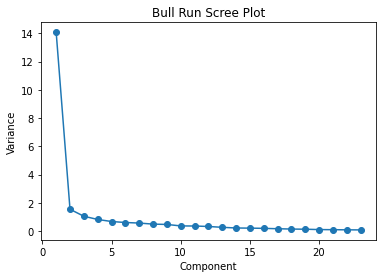

In [279]:
# scree plot - shows successive proportion of additional variance that each component adds
plt.plot(1+np.arange(len(bull_pca.get_factor_variance()[0])),
         bull_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

plt.title('Bull Run Scree Plot')

# if we choose 2 factors

In [280]:
#bull run

In [281]:
bull_pca2factors=factor_analyzer.FactorAnalyzer(n_factors=2,
                                          method='principal').fit(bull)

In [282]:
#get loadings
bullpca2=get_loadings_communalities(bull_pca2factors,index_names=list(bull.columns))

In [291]:
bullpca2

,RC1,RC2,communalities
BTC,0.872,-0.022,0.760
SOL,0.784,-0.030,0.615
MATIC,0.788,0.132,0.639
ETH,0.928,0.046,0.864
Gold,-0.041,0.849,0.722
USD,-0.130,-0.850,0.739
XRP,0.911,0.045,0.831
Dogcoin,0.822,0.052,0.678
Cardano,0.872,0.027,0.761
TRON,0.915,0.024,0.837


<AxesSubplot:>

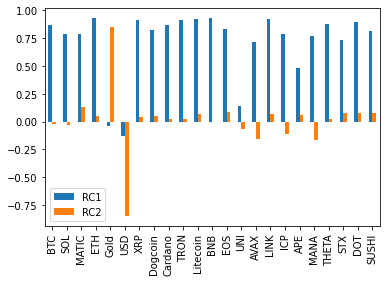

In [292]:
bullpca2[['RC1','RC2']].plot(kind="bar")

In [285]:
#winter
winter_pca= factor_analyzer.FactorAnalyzer(n_factors=bull.shape[1],
                                          rotation=None,
                                          method='principal').fit(winter)

In [294]:
get_summary(winter_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Sum of Squared Loadings,13.78,1.49,1.01,0.98,0.82,0.55,0.53,0.47,0.39,0.37,...,0.24,0.22,0.20,0.19,0.18,0.18,0.15,0.14,0.1,0.08
Proportion of Variance Explained,0.60,0.06,0.04,0.04,0.04,0.02,0.02,0.02,0.02,0.02,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.0,0.00
Cumulative Proportion,0.60,0.66,0.71,0.75,0.79,0.81,0.83,0.85,0.87,0.89,...,0.94,0.95,0.96,0.96,0.97,0.98,0.99,0.99,1.0,1.00


Text(0.5, 1.0, 'Winter Scree Plot')

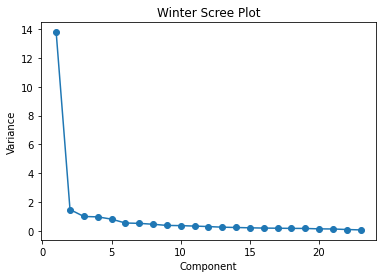

In [293]:
# scree plot - shows successive proportion of additional variance that each component adds
plt.plot(1+np.arange(len(winter_pca.get_factor_variance()[0])),
         winter_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Winter Scree Plot')

In [295]:
#winter
winter_pca2factors=factor_analyzer.FactorAnalyzer(n_factors=2,
                                          method='principal').fit(winter)
winterpca2=get_loadings_communalities(winter_pca2factors,index_names=list(winter.columns))

In [296]:
winterpca2

,RC1,RC2,communalities
BTC,0.878,0.084,0.777
SOL,0.885,0.031,0.785
MATIC,0.873,0.041,0.764
ETH,0.909,0.056,0.830
Gold,0.024,0.872,0.761
USD,-0.188,-0.799,0.674
XRP,0.824,-0.044,0.681
Dogcoin,0.784,0.009,0.614
Cardano,0.915,0.046,0.839
TRON,0.717,0.039,0.516


<AxesSubplot:>

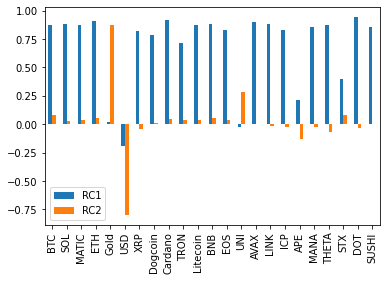

In [297]:
winterpca2[['RC1','RC2']].plot(kind="bar")